# การ trian ครั้งที่ 1

## สำรวจชุดข้อมูล

จากข้อมูลที่ได้มามี feature ทั้งหมด 23 feature และมี sample ทั้งหมด 10127 คน จากคำแนะนำของชุดข้อมูลได้ทำการลบ 2 feature สุดท้ายออก<br>
แยก feature Attrition_Flag ออกมาเก็บในตัวแปล df_y เหลือชุดข้อมูลในการวิเคราะห์ทั้งหมด 20 feature

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('credit_card_churn.csv',sep=',')
df.columns = ["CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
df_y = df["Attrition_Flag"]
df = df.drop(["Attrition_Flag","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis = 1)
print(df.shape)
df.head()

(10127, 20)


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


โดยชุดข้อมูลของคนที่ใช้ Credit card อยู่ในปัจจุบันมีจำนวน 8500 คน และ ยกเลิก Credit card มีจำนวน 1627 คน<br>
และไม่มี missing value ในชุดข้อมูล

In [12]:
print(df_y.value_counts())
print("")
# ดู missing valus
print(df.isnull().sum())
print(df.shape)
# code handmake
# for i in range(0,len(df.columns)):
#     print(df.columns[i] +"\t\t"+ str(df[str(df.columns[i])].isnull().sum()))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
(10127, 20)


แยกชุดข้อมูลประเภท numeric and classification และเพื่ม y ที่เปลี่ยนข้อมูลจาก["Existing Customer","Attrited Customer"] เป็น [1,0] เข้าไปในข้อมูลทั้ง 2 ประเภท<br> 

In [13]:
# df_y = pd.get_dummies(df_y)
df_y = df_y.replace(["Existing Customer","Attrited Customer"],[1,0])
print(df_y.value_counts())


1    8500
0    1627
Name: Attrition_Flag, dtype: int64


In [14]:

df_class = df.select_dtypes(object)
df_numer = df.drop(df_class.columns,axis= 1)

# เพื่ม y 
df_class = df_class.join([df_y])
df_numer = df_numer.join([df_y])
print("numeric : "+str(df_numer.shape))
print("numeric : "+str(df_class.shape))
# df_numer = df.drop(df_class.columns)


numeric : (10127, 16)
numeric : (10127, 6)


one-hot ข้อมูลประเภท classification ในอยู่ในแบบใน numeric 

In [15]:
df_class = pd.get_dummies(df_class)
print(len(df_class.shape))
# print(len(df_class.columns))

2


Plot heatmap numeric

<AxesSubplot:>

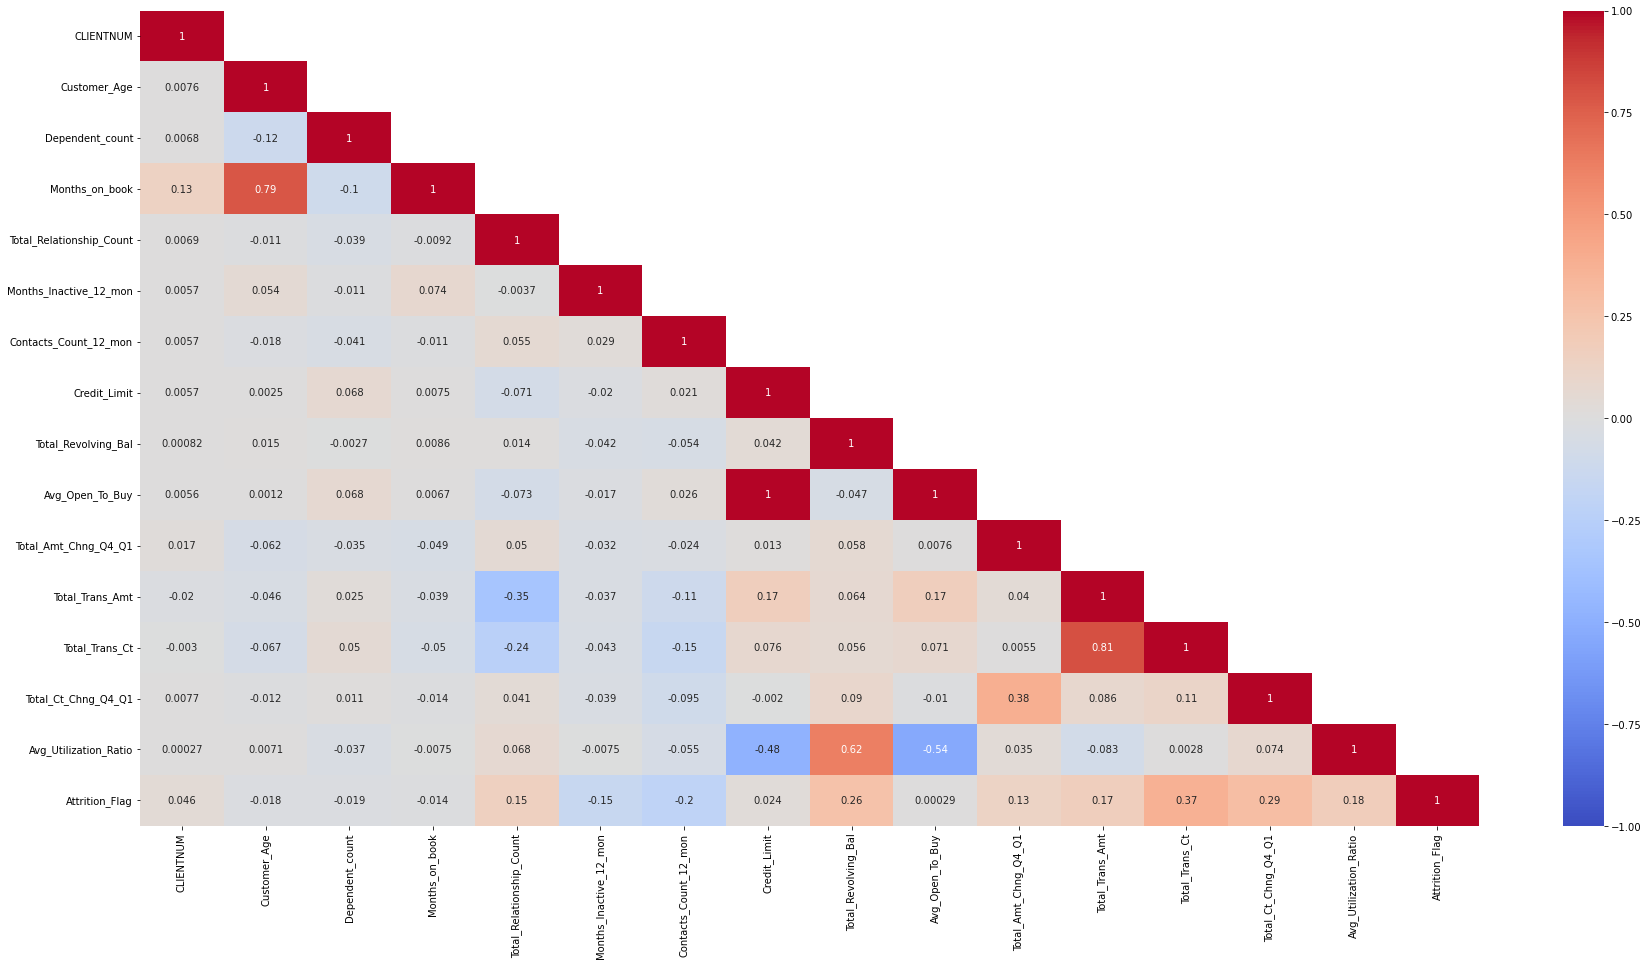

In [22]:
corr = df_numer.corr()
mask = np.array(corr)
# print(corr)
mask[np.tril_indices_from(mask)] = False     
fig,ax = plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corr,mask= mask,vmax =1,vmin = -1,annot= True,cmap= 'coolwarm')

Plot heatmap classification

<AxesSubplot:>

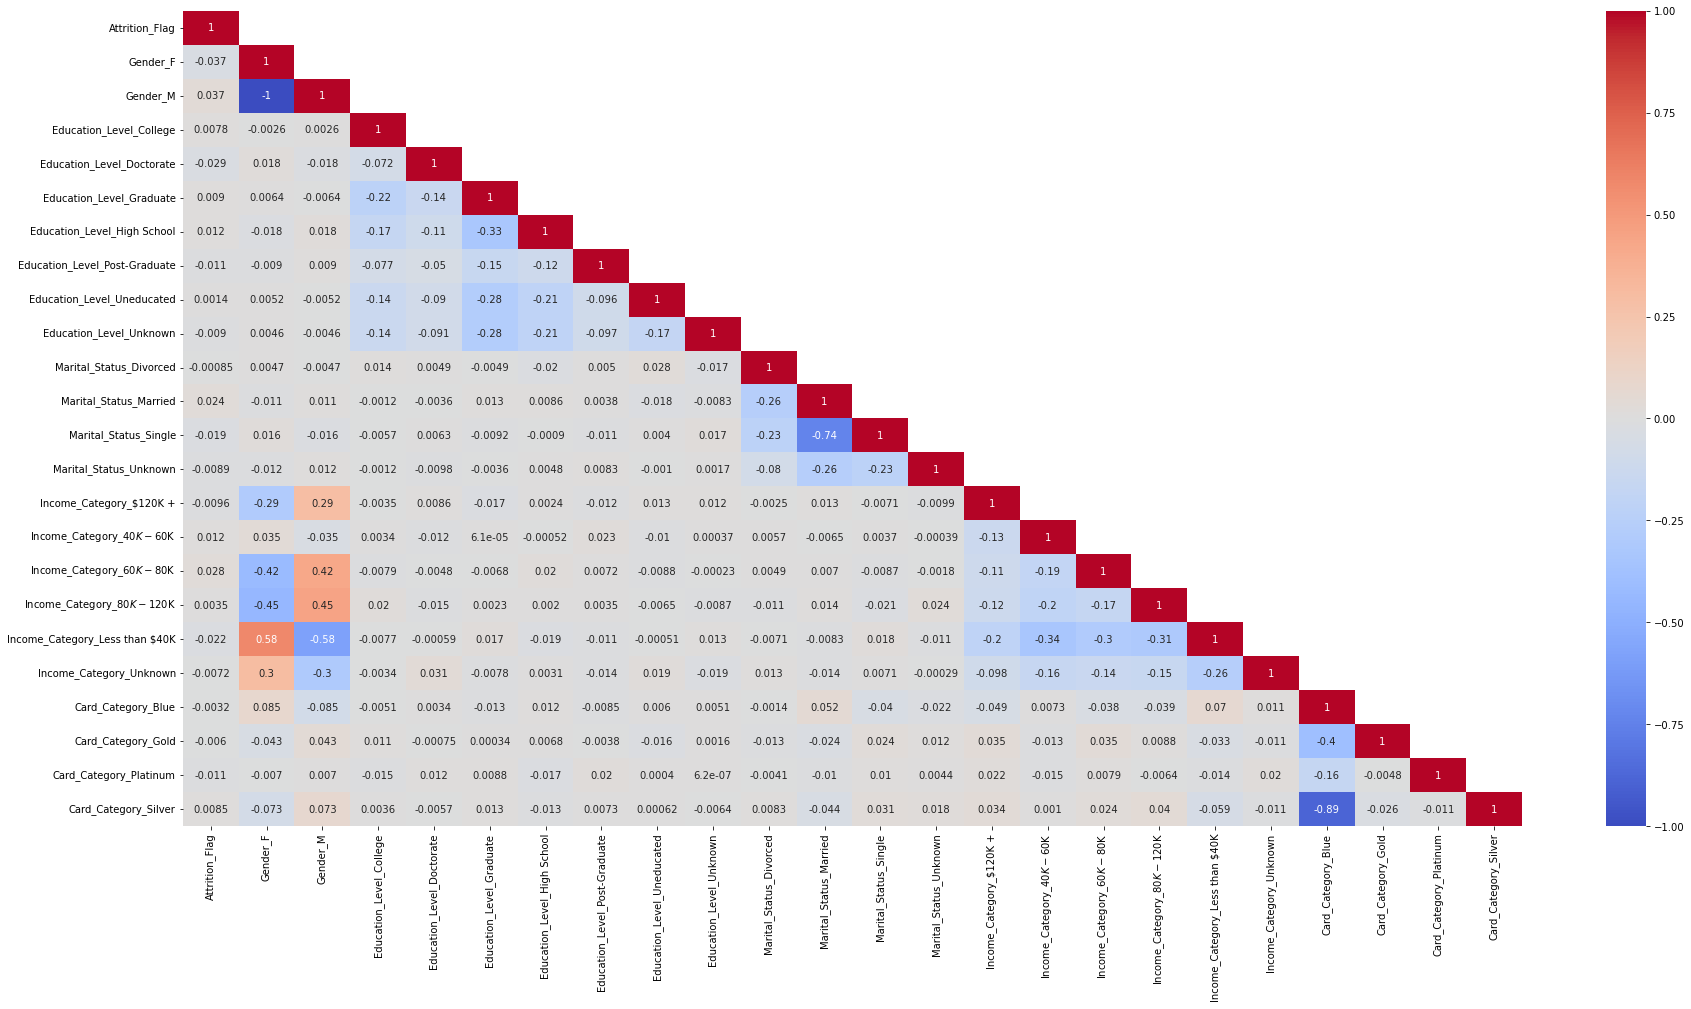

In [24]:
corr = df_class.corr()
mask = np.array(corr)
# print(corr)
mask[np.tril_indices_from(mask)] = False     
fig,ax = plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corr,mask= mask,vmax =1,vmin =-1,annot= True,cmap= 'coolwarm')

Pairplot numeric

In [18]:
# sns.pairplot(df_class,hue="Attrition_Flag")

Pairplot classification

In [19]:
# sns.pairplot(df_numer,hue="Attrition_Flag")

จากการ pairplot ข้อมูลประเภท 

# Data preprocessing

## เราได้เริ่มนำข้อมูลมาใส่ model ทั้ง 3 เพื่อหา model ที่เข้ากับข้อมูลได้ดีที่สุด

Decision tree

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size = 0.1,random_state = 0)

NameError: name 'iris' is not defined